-  **写在开头** 本章重点是对模拟Ajax请求的熟悉,知道如何模拟与模拟后的headers和params在哪里查找

In [ ]:
import requests
from lxml import etree
import pandas as pd
import chardet
import time
import warnings
warnings.filterwarnings("ignore")
import csv
import pandas as pd

# 动态网站爬取实战

In [ ]:
#网站后台模拟Ajax请求 - 利用headers和params配置成后台一致
headers={
   'authority': 'api.qimai.cn',
    'sec-ch-ua': '"Google Chrome";v="93", " Not;A Brand";v="99", "Chromium";v="93"',
    'accept': 'application/json, text/plain, */*',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"Windows"',
    'origin': 'https://www.qimai.cn',
    'sec-fetch-site': 'same-site',
    'sec-fetch-mode': 'cors',
    'sec-fetch-dest': 'empty',
    'referer': 'https://www.qimai.cn/',
    'accept-language': 'zh-CN,zh;q=0.9',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/92.0.4515.131 Safari/537.36',
    'cookies':'qm_check=SxJXQEUSChd2fHd1dRQQeV5EVVwcEHxZRlVVGGYREHh0EHdCUUVfW1NKEAILABB0WUJVU0EEdgEIEEJLbwVvABBAQ2oCbQAVEHALdAEBHQIBHgcHHAEPHgANBwQZEhwSU11SUVsbChYIHAAcABwAHAUVTw==; gr_user_id=1c88f585-a363-4626-8315-a8e4d23054a9; PHPSESSID=ri2v6hhqvkq9a1f7r0ib5p9umm; ada35577182650f1_gr_session_id=2c176522-081c-46e0-9424-3fbafd729e49; ada35577182650f1_gr_session_id_2c176522-081c-46e0-9424-3fbafd729e49=true; synct=1635231873.914; syncd=-2687; tgw_l7_route=1ed618a657fde25bb053596f222bc44a'
}
params={
    'analysis':'dQ59QSxadUR9ZHFEdQ5uQipZcBJSd35FUWhyVwYFDQh0FU5CUV5bH1leXAFPaAhBRU5SQlFeVG9ZXEsGeEcFBFEBAAcGCAcEDFN3G1U',
    'brand':'all',
    'country':'cn',
    'device':'iphone',
    'genre':'36',
    'date':'2021-10-26',
    'page':'2'
}

response = requests.get('https://api.qimai.cn/rank/indexPlus/brand_id/1',headers=headers,params=params)
lists = response.json()['list']
results = []
for i in lists:
    result = {}
    #创建字典键result[] = 调用json中字典的字典数据dict[][]
    result['APP'] = i['appInfo']['appName']
    result['类型'] = i['genre']
    result['公司'] = i['appInfo']['publisher']
    result['排名'] = i['index']
    print(result)
    results.append(result)

# Taks6作业

- 目标网站：https://www.qimai.cn/rank/marketRank
- 目的：尝试通过上面讲述的方式去调试获取以下的数据

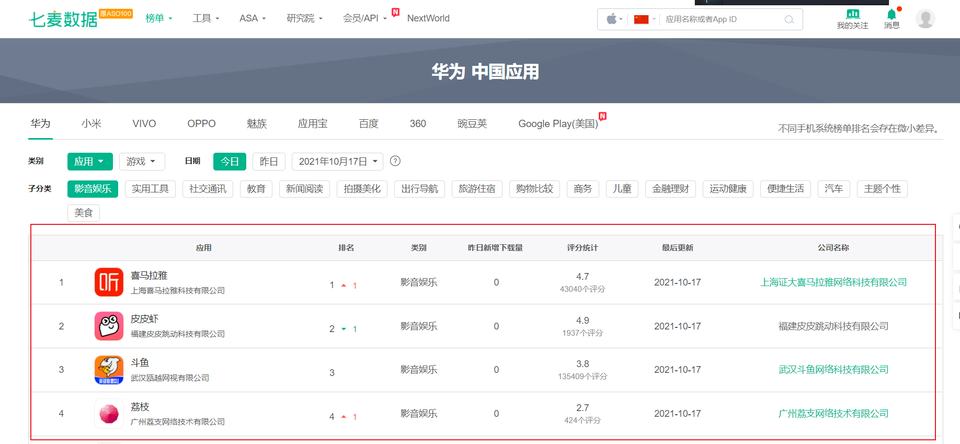

In [ ]:
headers={
    'accept': 'application/json, text/plain, */*',
    'accept-encoding': 'gzip, deflate, br',
    'accept-language': 'zh-CN,zh;q=0.9',
    'cookie': 'qm_check=SxJXQEUSChd2fHd1dRQQeV5EVVwcEHxZRlVVGGYREHh0EHdCUUVfW1NKEAILABB0WUJVU0EEdgEIEEJLbwVvABBAQ2oCbQAVEHALdAEBHQIBHgcHHAEPHgANBwQZEhwSU11SUVsbChYIHAAcABwAHAUVTw%3D%3D; gr_user_id=1c88f585-a363-4626-8315-a8e4d23054a9; PHPSESSID=ri2v6hhqvkq9a1f7r0ib5p9umm; ada35577182650f1_gr_session_id=2c176522-081c-46e0-9424-3fbafd729e49; ada35577182650f1_gr_session_id_2c176522-081c-46e0-9424-3fbafd729e49=true; tgw_l7_route=29ef178f2e0a875a4327cbfe5fbcff7e; synct=1635235819.451; syncd=-2557',
    'origin': 'https://www.qimai.cn',
    'referer': 'https://www.qimai.cn/',
    'sec-ch-ua': '"Chromium";v="92", " Not A;Brand";v="99", "Google Chrome";v="92"',
    'sec-ch-ua-mobile': '?0',
    'sec-fetch-dest': 'empty',
    'sec-fetch-mode': 'cors',
    'sec-fetch-site': 'same-site',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/92.0.4515.131 Safari/537.36'
}
params={
    'analysis':'eEcbRABeWx9dUUJbXRBlWQpfdkIBAgABAQABDlEODFN0FVA=',
}
response = requests.get('https://api.qimai.cn/rank/marketRank',headers=headers,params=params)
lists = response.json()['rankInfo']

In [ ]:
results = []
for i in lists:
    result ={}
    result['APP'] = i['appInfo']['appName']
    result['公司'] = i['appInfo']['publisher']
    result['类型'] = i['genre']
    result['时间'] = i['releaseTime']
    print(result)
    results.append(result)

In [ ]:
last_result = pd.DataFrame(results)
last_result.to_excel(r'G:\Git_\网络爬虫\Python爬虫实战-和鲸社区\输出\Task6_作业.xlsx',encoding='utf-8')